In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
from cds import plotting
from adjustText import adjust_text

In [3]:
!pwd

/Users/mkazachk/Documents/Uris_paper


In [4]:
anot = pd.read_csv('aneuploidy_data_NEW.csv',index_col=0)

anot_CCLE = anot.copy()
anot_CCLE.index = anot_CCLE.loc[:,'CCLE_ID']

In [5]:
my_pal = {"Diploid": "C0", "Aneuploid": "firebrick"}
my_order = order=['Diploid','Aneuploid']

In [6]:
from taigapy import TaigaClient
tc = TaigaClient()

sample_info = tc.get(name='internal-19q4-fb11', version=29, file='sample_info')

sample_info.index = sample_info.loc[:,'CCLE_Name'] 

sample_info = sample_info[~sample_info.index.duplicated(keep='first')]

bone = sample_info[sample_info.loc[:,'lineage'] == 'bone'].index
breast = sample_info[sample_info.loc[:,'lineage'] == 'breast'].index
colon = sample_info[sample_info.loc[:,'lineage'] == 'colorectal'].index
lung = sample_info[sample_info.loc[:,'lineage'] == 'lung'].index
ovary = sample_info[sample_info.loc[:,'lineage'] == 'ovary'].index

In [7]:
num_arm = pd.DataFrame(anot_CCLE.loc[:,'num_arm_events'])
num_arm['lineage'] = sample_info.loc[num_arm.index,'lineage']



In [8]:
to_drop = []

for x in num_arm.index:
    if  num_arm.loc[x,'lineage'] != 'gastric' \
        and num_arm.loc[x,'lineage'] != 'colorectal' and num_arm.loc[x,'lineage'] != 'uterus' \
        and num_arm.loc[x,'lineage'] != 'skin' and num_arm.loc[x,'lineage'] != 'ovary' \
        and num_arm.loc[x,'lineage'] != 'lung'  and num_arm.loc[x,'lineage'] != 'bone':
            to_drop.append(x)
            
num_arm_ = num_arm.drop(to_drop)


In [9]:
num_arm_ = num_arm.copy()

In [10]:
num_arm_.groupby('lineage').median().sort_values('num_arm_events')

,num_arm_events
lineage,
fibroblast,0.0
uterus,4.5
lymphocyte,5.0
blood,6.0
soft_tissue,6.0
peripheral_nervous_system,6.0
bone,10.0
plasma_cell,11.0
colorectal,11.5


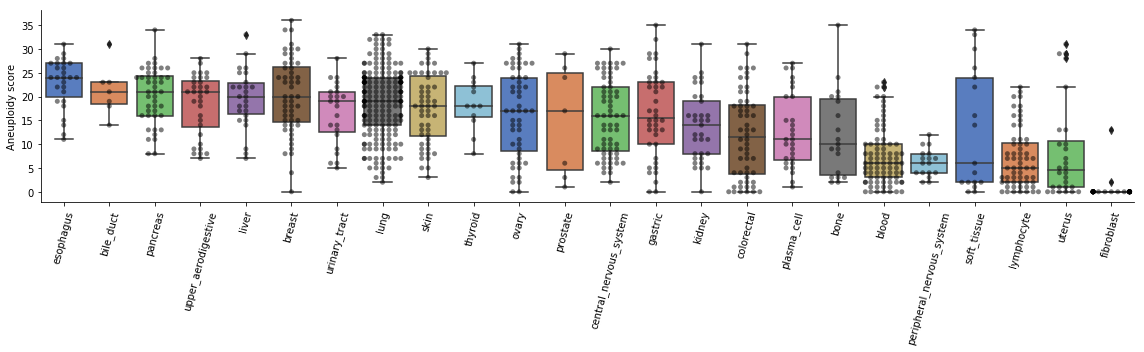

In [11]:
plt.subplots(figsize=(16,5))

ax = sns.boxplot(x="lineage", y="num_arm_events",
                     data=num_arm_ ,palette="muted",order = num_arm_.groupby('lineage').median().sort_values('num_arm_events',ascending=False).index)
sns.swarmplot(x="lineage", y="num_arm_events",
                    data=num_arm_,color='black',alpha=.5,order = num_arm_.groupby('lineage').median().sort_values('num_arm_events',ascending=False).index)#palette="muted")

plt.xticks(rotation=75) 
plt.ylabel('Aneuploidy score')
plt.xlabel('')
plotting.simpleaxis(ax)
plt.tight_layout()
plt.savefig('supp1/lineages_1.pdf')

In [12]:
num_arm_.shape

(997, 2)

In [13]:
CCLE_ABSOLUTE_combined_table = tc.get(name='ccle-absolute-cn', version=5, file='CCLE_ABSOLUTE_combined_table')

CCLE_ABSOLUTE_combined_table.index = CCLE_ABSOLUTE_combined_table.loc[:,'CCLE_ID']

zero_dups = CCLE_ABSOLUTE_combined_table[CCLE_ABSOLUTE_combined_table.loc[:,'Genome doublings'] == 0].index

In [14]:
dups = CCLE_ABSOLUTE_combined_table.loc[:,'Genome doublings']

In [15]:
anot_dups = pd.DataFrame(anot_CCLE.loc[:,'num_arm_events'].copy())

In [16]:
anot_dups['dubs'] = 0
anot_dups.loc[:,'dubs'] = dups.loc[anot_dups.index]

In [17]:

from statannot import add_stat_annotation

In [18]:
anot_dups.loc[:,'dubs']= anot_dups.loc[:,'dubs'].astype(str)

/Users/mkazachk/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0 v.s. 1: t-test independent samples, P_val=3.356e-195 stat=-3.866e+01
1 v.s. 2: t-test independent samples, P_val=1.926e-14 stat=-7.883e+00
0 v.s. 2: t-test independent samples, P_val=3.943e-103 stat=-2.704e+01


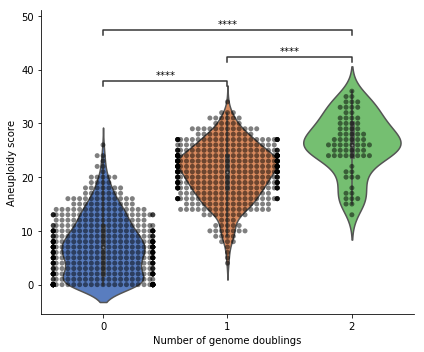

In [19]:


anot_dups.sort_values('dubs')

plt.subplots(figsize=(6,5))

ax = sns.violinplot(x="dubs", y="num_arm_events",
                     data=anot_dups ,palette="muted",order=['0','1','2'])
ax = sns.swarmplot(x="dubs", y="num_arm_events",
                     data=anot_dups, color='black',alpha=.5,order=['0','1','2'])


add_stat_annotation(ax, data=anot_dups, x="dubs", y="num_arm_events", order=['0','1','2'],
                    box_pairs=[('0', '1'), ('1', '2'), ('0', '2')],
                    test='t-test_ind', text_format='star', loc='inside', verbose=2);


plt.ylabel('Aneuploidy score')
plt.xlabel('Number of genome doublings')
plotting.simpleaxis(ax)
plt.tight_layout()
plt.savefig('supp1/WGD_2.pdf')

In [20]:
depmap_19Q4_mutation_calls = tc.get(name='depmap-mutation-calls-9a1a', version=14, file='depmap_19Q4_mutation_calls')


#depmap_19Q4_mutation_calls.index = depmap_19Q4_mutation_calls.loc[:,'DepMap_ID']


In [21]:

depmap_19Q4_mutation_calls.index = depmap_19Q4_mutation_calls.loc[:,'DepMap_ID']

tp53 = depmap_19Q4_mutation_calls[depmap_19Q4_mutation_calls.loc[:,'Hugo_Symbol'] == 'TP53']

In [22]:

shared = set(depmap_19Q4_mutation_calls.index & anot.index)

muts = (tp53.loc[shared,'Variant_annotation'].replace(float('NaN'),'WT').replace('damaging','DAM').replace('other non-conserving','ONC').replace('silent','SIL')).replace('wildtype','WT')



/Users/mkazachk/miniconda3/lib/python3.6/site-packages/pandas/core/indexing.py:961: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]


In [23]:
muts.index = anot.loc[muts.index,'CCLE_ID']

In [24]:
muts

CCLE_ID
HS600T_FIBROBLAST                            WT
SNU182_LIVER                                ONC
T3M10_LUNG                                  ONC
SNU1077_ENDOMETRIUM                         ONC
NCIH522_LUNG                                DAM
                                           ... 
KHM1B_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE     WT
SNUC4_LARGE_INTESTINE                       ONC
MDAMB435S_SKIN                              ONC
WM2664_SKIN                                  WT
SH10TC_STOMACH                              ONC
Name: Variant_annotation, Length: 1136, dtype: object

In [25]:
damaging_mutation = tc.get(name='depmap-mutation-calls-9a1a', version=14, file='damaging_mutation')



In [26]:
muts

CCLE_ID
HS600T_FIBROBLAST                            WT
SNU182_LIVER                                ONC
T3M10_LUNG                                  ONC
SNU1077_ENDOMETRIUM                         ONC
NCIH522_LUNG                                DAM
                                           ... 
KHM1B_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE     WT
SNUC4_LARGE_INTESTINE                       ONC
MDAMB435S_SKIN                              ONC
WM2664_SKIN                                  WT
SH10TC_STOMACH                              ONC
Name: Variant_annotation, Length: 1136, dtype: object

In [29]:


damaging = damaging_mutation[damaging_mutation.loc[:,'TP53 (7157)']==1.0].index

damaging_include = temp.index & damaging

wt_include = muts[muts == 'WT'].index & temp.index

muts_ = muts.drop(muts[muts == 'DAM'].index)
onc_include = muts_[muts_ == 'ONC'].index & temp.index
sil_include = muts_[muts_ == 'SIL'].index & temp.index

temp['mutation status'] = ''

temp.loc[damaging_include,'mutation status'] = 'DAM'
temp.loc[wt_include,'mutation status'] =  'WT'
temp.loc[onc_include,'mutation status'] = 'ONC'
temp.loc[sil_include,'mutation status'] = 'SIL'

In [197]:


# plt.ylabel('Aneuploidy score')
# plt.xlabel('Number of genome doublings')
# plotting.simpleaxis(ax)

# plt.savefig('supp1/WGD_2.pdf')

/Users/mkazachk/miniconda3/lib/python3.6/site-packages/pandas/core/indexing.py:961: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]
/Users/mkazachk/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

WT v.s. SIL: t-test independent samples, P_val=9.996e-01 stat=-5.436e-04
WT v.s. ONC: t-test independent samples, P_val=1.823e-22 stat=-1.008e+01
WT v.s. DAM: t-test independent samples, P_val=1.115e-14 stat=-7.951e+00


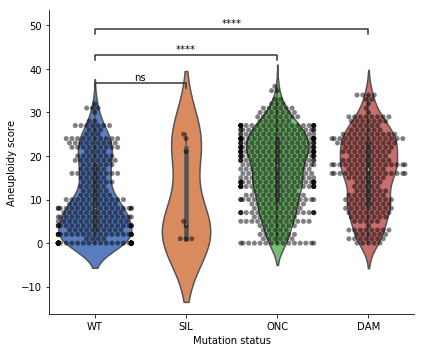

In [30]:
temp = pd.DataFrame(anot_CCLE.loc[:,'num_arm_events'].copy())

shared = set(anot_CCLE.index)
shared_depmap = sample_info.loc[shared,'DepMap_ID']
shared_depmap = set(shared_depmap) & set(depmap_19Q4_mutation_calls.index)



muts = (tp53.loc[shared_depmap,'Variant_annotation'].replace(float('NaN'),'WT').replace('damaging','DAM').replace('other non-conserving','ONC').replace('silent','SIL'))


muts.index = anot.loc[muts.index,'CCLE_ID']

shared = set(anot.loc[:,'CCLE_ID']) & set(muts.index)
temp = temp.loc[shared]
temp['ploidy'] = anot_CCLE.loc[temp.index,'many_arm_events']

trus = temp[temp.loc[:,'ploidy']==True].index 
temp.loc[trus,'ploidy']= 'Aneuploid'
falsee = temp[temp.loc[:,'ploidy']==False].index 
temp.loc[falsee,'ploidy']=  'Diploid'

temp.index = sample_info.loc[temp.index,'DepMap_ID']

muts = (tp53.loc[shared_depmap,'Variant_annotation'].replace(float('NaN'),'WT').replace('damaging','DAM').replace('other non-conserving','ONC').replace('silent','SIL'))


damaging = damaging_mutation[damaging_mutation.loc[:,'TP53 (7157)']==1.0].index

damaging_include = temp.index & damaging

wt_include = muts[muts == 'WT'].index & temp.index

muts_ = muts.drop(muts[muts == 'DAM'].index)
onc_include = muts_[muts_ == 'ONC'].index & temp.index
sil_include = muts_[muts_ == 'SIL'].index & temp.index

temp['mutation status'] = ''

temp.loc[damaging_include,'mutation status'] = 'DAM'
temp.loc[wt_include,'mutation status'] =  'WT'
temp.loc[onc_include,'mutation status'] = 'ONC'
temp.loc[sil_include,'mutation status'] = 'SIL'

# temp.index = temp.loc[]

plt.subplots(figsize=(6,5))

ax = sns.violinplot(x="mutation status", y="num_arm_events",
                     data=temp ,palette="muted",order=['WT','SIL','ONC','DAM'])
ax = sns.swarmplot(x="mutation status", y="num_arm_events",
                     data=temp, color='black',alpha=.5,order=['WT','SIL','ONC','DAM'])


add_stat_annotation(ax, data=temp, x="mutation status", y="num_arm_events", order=['WT','SIL','ONC','DAM'],
                    box_pairs=[('WT', 'SIL'),('WT', 'ONC'),('WT', 'DAM')],
                    test='t-test_ind', text_format='star', loc='inside', verbose=2);






plt.ylabel('Aneuploidy score')
plt.xlabel('Mutation status')
plotting.simpleaxis(ax)
plt.tight_layout()

plt.savefig('supp1/tp53_3.pdf')

In [31]:
sample_info_depmap = sample_info.copy()
sample_info_depmap.index = sample_info.loc[:,'DepMap_ID']#.loc[gene_effect_rnai_achilles.index,'lineage']

In [32]:
public_19Q4_proteincoding_tpm = tc.get(name='depmap-rnaseq-expression-data-ccd0', version=16, file='public_19Q4_proteincoding_tpm')

public_19Q4_proteincoding_tpm.columns = public_19Q4_proteincoding_tpm.columns.str.split(' ').str[0]

cin70 = pd.read_csv('cin70genes.csv',index_col=0,header=None)
het70 = pd.read_csv('het70genes.csv')

big_list_cin70 = []




for i in range(1,14,2):
    big_list_cin70+= list(cin70.index.str.split(' ').str[i].dropna())

list_cin70 = ['TPX2',
 'PRC1',
 'FOXM1',
 'CDC2',
 'TGIF2',
 'MCM2',
 'H2AFZ',
 'TOP2A',
 'PCNA',
 'UBE2C',
 'MELK',
 'TRIP13',
 'CNAP1',
 'MCM7',
 'RNASEH2A',
 'CDC45L',
 'ESPL1',
 'FEN1',
 'CCT5',
 'ATAD2',
 'NUP205',
 'CKS2',
 'ELAVL1',
 'RRM1',
 'AURKB',
 'CTPS',
 'OIP5',
 'PTTG1',
 'MCM10',
 'MTB',
 'ASF1B',
 'CDC6',
 'ACTL6A',
 'GPI',
 'HDGF',
 'NXT1',
 'NEK2',
 'DHCR7',
 'NDUFAB1',
 'KIAA0286',
 'KIF4A',
 'RAD51AP1',
 'MAD2L1',
 'CCNB2',
 'TTK',
 'RFC4',
 'ch-TOG',
 'CDC20',
 'RRM2',
 'CCNB1',
 'MSH6',
 'DKC1',
 'CDCA8',
 'CEP55',
 'LSM4',
 'ZWINT',
 'UNG',
 'SFRS2',
 'STK6',
 'KIF20A',
 'EZH2',
 'H2AFX',
 'TOPK',
 'MTCH2',
 'CMAS',
 'FLJ10036',
 'RAD21',
 'BRRN1',
 'CDCA3',
 'ECT2']

het70_genes = het70.drop([0]).values[:,0]



# now create our signature scores

cin70_scores = public_19Q4_proteincoding_tpm.loc[:,list_cin70].mean(axis=1)
het70_scores = public_19Q4_proteincoding_tpm.loc[:,het70_genes].mean(axis=1)

public_19Q4_proteincoding_tpm_CCLE = public_19Q4_proteincoding_tpm.copy()

public_19Q4_proteincoding_tpm_CCLE.index = sample_info_depmap.loc[public_19Q4_proteincoding_tpm_CCLE.index,'CCLE_Name']

cin70_scores_CCLE = public_19Q4_proteincoding_tpm_CCLE.loc[:,list_cin70].mean(axis=1)
het70_scores_CCLE = public_19Q4_proteincoding_tpm_CCLE.loc[:,het70_genes].mean(axis=1)

/Users/mkazachk/miniconda3/lib/python3.6/site-packages/pandas/core/indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [33]:
#scores = pd.DataFrame(anot_CCLE.loc[:,'num_arm_events'].copy())
scores = pd.DataFrame(cin70_scores_CCLE.copy())
#scores['cin70'] = 0
#scores = cin70_scores_CCLE.loc[scores.index]#scores.loc[:,'cin70'] #= cin70_scores_CCLE.loc[scores.index]
#scores['het70'] = 0
scores.loc[:,'het70'] = het70_scores_CCLE.loc[scores.index]

In [34]:
scores.columns = ['cin70','het70']

In [35]:
scores = pd.melt(scores.reset_index(), id_vars='CCLE_Name')

In [36]:
scores.index = scores.loc[:,'CCLE_Name']

In [37]:
scores = scores.dropna()

In [38]:
scores['num_arm_events'] = 0
scores.loc[:,'num_arm_events'] = anot_CCLE.loc[scores.index,'num_arm_events']

/Users/mkazachk/miniconda3/lib/python3.6/site-packages/pandas/core/indexing.py:961: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]


In [39]:


shared = set(anot.loc[:,'CCLE_ID']) & set(scores.index)
temp = scores.loc[shared]
temp['ploidy'] = anot_CCLE.loc[temp.index,'many_arm_events']

trus = temp[temp.loc[:,'ploidy']==True].index 
temp.loc[trus,'ploidy']= 'Aneuploid'
falsee = temp[temp.loc[:,'ploidy']==False].index 
temp.loc[falsee,'ploidy']=  'Diploid'



In [40]:
temp

,CCLE_Name,variable,value,num_arm_events,ploidy
CCLE_Name,,,,,
HS739T_FIBROBLAST,HS739T_FIBROBLAST,cin70,4.824823,0.0,Diploid
HS739T_FIBROBLAST,HS739T_FIBROBLAST,het70,6.684584,0.0,Diploid
NCIH2196_LUNG,NCIH2196_LUNG,cin70,6.558470,11.0,NaN
NCIH2196_LUNG,NCIH2196_LUNG,het70,4.784590,11.0,NaN
DMS273_LUNG,DMS273_LUNG,cin70,6.103186,18.0,NaN
...,...,...,...,...,...
SW780_URINARY_TRACT,SW780_URINARY_TRACT,het70,4.980910,6.0,Diploid
HCC44_LUNG,HCC44_LUNG,cin70,5.000362,32.0,Aneuploid
HCC44_LUNG,HCC44_LUNG,het70,5.034086,32.0,Aneuploid


/Users/mkazachk/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

cin70_Diploid v.s. cin70_Aneuploid: t-test independent samples, P_val=2.246e-01 stat=-1.216e+00
het70_Diploid v.s. het70_Aneuploid: t-test independent samples, P_val=7.295e-05 stat=-3.998e+00


No handles with labels found to put in legend.


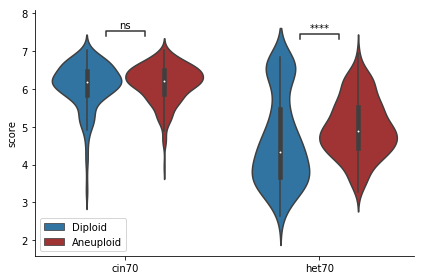

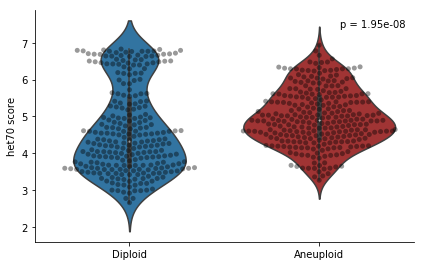

In [43]:
from scipy import stats
ax = sns.violinplot(x="variable", y="value", hue = 'ploidy',
                     data=temp, palette = my_pal)



box_pairs=[
    (("cin70", "Diploid"), ("cin70", "Aneuploid")),
    (("het70", "Diploid"), ("het70", "Aneuploid"))
    ]
width = 0.4
add_stat_annotation(ax, data=temp, x='variable', y='value', hue='ploidy', width=width,
                    box_pairs=box_pairs, test='t-test_ind', loc='inside', verbose=2)


plt.ylabel('score')
plt.xlabel('')
plotting.simpleaxis(ax)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[0:])
plt.tight_layout()
plt.savefig('supp1/cins_het_4.pdf')


plt.figure()


temp2 = temp[temp.loc[:,'variable'] == 'het70']
temp2
ax = sns.violinplot(x="ploidy", y="value",
                     data=temp2, palette = my_pal)
ax = sns.swarmplot(x="ploidy", y="value",
                     data=temp2, color='black',alpha=.4)
plotting.simpleaxis(ax)

tt,p_val = stats.ttest_ind(temp2.loc[trus,'value'].dropna(),temp2.loc[falsee,'value'].dropna())
ax.legend(title='p = '+ str(round(p_val,10)),frameon=False)
plt.tight_layout()
plt.xlabel('')
plt.ylabel('het70 score')
plt.savefig('supp1/het_4.pdf')


/Users/mkazachk/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/mkazachk/miniconda3/lib/python3.6/site-packages/pandas/core/indexing.py:961: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]
No handles with labels found to put in legend.


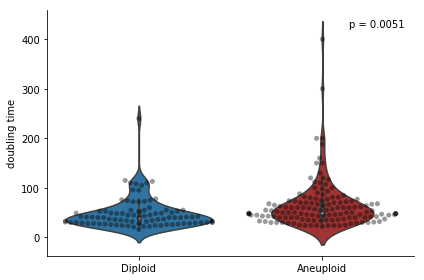

In [44]:
pd.DataFrame(anot_CCLE.loc[:,'num_arm_events'].copy())


shared = set(anot.loc[:,'CCLE_ID']) 
temp = pd.DataFrame(anot_CCLE.loc[:,'num_arm_events'].copy())
temp['ploidy'] = anot_CCLE.loc[temp.index,'many_arm_events']

trus = temp[temp.loc[:,'ploidy']==True].index 
temp.loc[trus,'ploidy']= 'Aneuploid'
falsee = temp[temp.loc[:,'ploidy']==False].index 
temp.loc[falsee,'ploidy']=  'Diploid'

temp['dub'] = 0

temp['dub'] = anot_CCLE.loc[temp.index,'RNAi_doubling_time']

temp_doubling = temp[temp.loc[:,'dub']== temp.loc[:,'dub']]


temp['doubling time'] = ''

below_50 = temp_doubling[temp_doubling.loc[:,'dub'] < 35].index

_50_to_75 = temp_doubling.drop(below_50)[temp_doubling.drop(below_50).loc[:,'dub'] < 50].index

_75_to_100 = temp_doubling.drop(list(below_50)+list(_50_to_75))[temp_doubling.drop(list(below_50)+list(_50_to_75)).loc[:,'dub'] < 65].index


above_100 = temp_doubling[temp_doubling.loc[:,'dub'] >64].index

temp.loc[below_50,'doubling time'] = '< 35'
temp.loc[_50_to_75,'doubling time'] = '35-49'
temp.loc[_75_to_100,'doubling time'] = '50-64'
temp.loc[above_100,'doubling time'] = '> 64'


ax = sns.violinplot(y="dub", x="ploidy",
                     data=temp_doubling.dropna(), palette = my_pal,order=my_order)


ax = sns.swarmplot(y="dub", x="ploidy",
                     data=temp_doubling.dropna(),color='black',alpha=.4,order=my_order)
tt,p_val = stats.ttest_ind(temp_doubling.loc[trus,'dub'].dropna(),temp_doubling.loc[falsee,'dub'].dropna())
ax.legend(title='p = '+ str(round(p_val,4)),frameon=False)

plt.ylabel('doubling time')
plt.xlabel('')

plt.tight_layout()
plotting.simpleaxis(ax)

plt.savefig('supp1/doubling_5.pdf')

In [225]:
temp_doubling

,num_arm_events,ploidy,dub
CCLE_ID,,,
G401_SOFT_TISSUE,0,Diploid,36.0
COV434_OVARY,0,Diploid,24.0
A204_SOFT_TISSUE,0,Diploid,28.0
HUTU80_SMALL_INTESTINE,0,Diploid,26.0
CAL51_BREAST,0,Diploid,24.0
...,...,...,...
ABC1_LUNG,33,Aneuploid,81.0
HCC70_BREAST,34,Aneuploid,93.0
UACC257_SKIN,39,Aneuploid,45.0


In [45]:
################ Also make Fig 7D


from taigapy import TaigaClient
tc = TaigaClient()

gene_effect_rnai_achilles = tc.get(name='demeter2-achilles-5386', version=13, file='gene_effect')
gene_effect_rnai_drive = tc.get(name='demeter2-drive-0591', version=12, file='gene_effect')
gene_effect_crispr_achilles = tc.get(name='avana-public-tentative-19q4-c2df', version=4, file='gene_effect')

In [46]:
from scipy import stats

/Users/mkazachk/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.


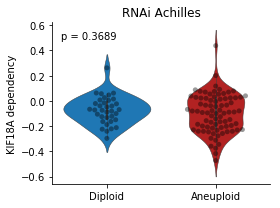

In [47]:

fix,ax = plt.subplots(figsize=(4,3))

shared = set(anot_CCLE.index) & set(gene_effect_rnai_achilles.index)
temp = gene_effect_rnai_achilles.loc[shared]
temp['ploidy'] = anot_CCLE.loc[temp.index,'many_arm_events']

trus = temp[temp.loc[:,'ploidy']==True].index 
temp.loc[trus,'ploidy']= 'Aneuploid'
falsee = temp[temp.loc[:,'ploidy']==False].index 
temp.loc[falsee,'ploidy']=  'Diploid'




sns.violinplot(y = 'KIF18A (81930)',x='ploidy', data = temp,saturation=1,linewidth=.5,order=my_order,palette = my_pal)
sns.swarmplot(y = 'KIF18A (81930)',x='ploidy', data = temp,color='black',alpha=.4,order=my_order)


plt.xlabel('')
plt.ylabel('KIF18A dependency')
plotting.simpleaxis()



tt,p_val = stats.ttest_ind(temp.loc[trus,'KIF18A (81930)'].dropna(),temp.loc[falsee,'KIF18A (81930)'].dropna())
ax.legend(title='p = '+ str(round(p_val,4)),frameon=False)
plt.title('RNAi Achilles')
plt.tight_layout()
plt.savefig('fig7d/KIF18A_rnai_achilles.pdf')
# plt.savefig('fig3c/prism.pdf')

/Users/mkazachk/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.


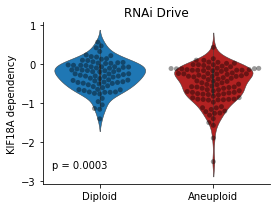

In [48]:

fix,ax = plt.subplots(figsize=(4,3))

shared = set(anot_CCLE.index) & set(gene_effect_rnai_drive.index)
temp = gene_effect_rnai_drive.loc[shared]
temp['ploidy'] = anot_CCLE.loc[temp.index,'many_arm_events']

trus = temp[temp.loc[:,'ploidy']==True].index 
temp.loc[trus,'ploidy']= 'Aneuploid'
falsee = temp[temp.loc[:,'ploidy']==False].index 
temp.loc[falsee,'ploidy']=  'Diploid'



#fig,ax = plt.subplots()
sns.violinplot(y = 'KIF18A (81930)',x='ploidy', data = temp,saturation=1,linewidth=.5,order=my_order,palette = my_pal,ax=ax)
sns.swarmplot(y = 'KIF18A (81930)',x='ploidy', data = temp,color='black',alpha=.4,order=my_order)


plt.xlabel('')
plt.ylabel('KIF18A dependency')
plotting.simpleaxis()



tt,p_val = stats.ttest_ind(temp.loc[trus,'KIF18A (81930)'].dropna(),temp.loc[falsee,'KIF18A (81930)'].dropna())
ax.legend(title='p = '+ str(round(p_val,4)),frameon=False)
plt.title('RNAi Drive')
plt.tight_layout()
plt.savefig('fig7d/KIF18A_rnai_drive.pdf')
# plt.savefig('fig3c/prism.pdf')

/Users/mkazachk/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.


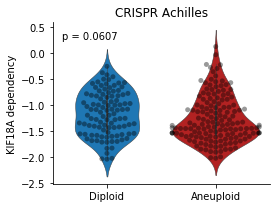

In [49]:

fix,ax = plt.subplots(figsize=(4,3))

shared = set(anot.index) & set(gene_effect_crispr_achilles.index)
temp = gene_effect_crispr_achilles.loc[shared]
temp['ploidy'] = anot.loc[temp.index,'many_arm_events']

trus = temp[temp.loc[:,'ploidy']==True].index 
temp.loc[trus,'ploidy']= 'Aneuploid'
falsee = temp[temp.loc[:,'ploidy']==False].index 
temp.loc[falsee,'ploidy']=  'Diploid'



#fig,ax = plt.subplots()
sns.violinplot(y = 'KIF18A (81930)',x='ploidy', data = temp,saturation=1,linewidth=.5,order=my_order,palette = my_pal,ax=ax)
sns.swarmplot(y = 'KIF18A (81930)',x='ploidy', data = temp,color='black',alpha=.4,order=my_order)


plt.xlabel('')
plt.ylabel('KIF18A dependency')
plotting.simpleaxis()



tt,p_val = stats.ttest_ind(temp.loc[trus,'KIF18A (81930)'].dropna(),temp.loc[falsee,'KIF18A (81930)'].dropna())
ax.legend(title='p = '+ str(round(p_val,4)),frameon=False)
plt.title('CRISPR Achilles')
plt.tight_layout()
plt.savefig('fig7d/KIF18A_crispr_achilles.pdf')
# plt.savefig('fig3c/prism.pdf')

In [247]:
# extra plot

In [51]:
data = pd.read_csv('10CL_reversine_for_plot.csv',index_col='cell line')

In [52]:
data['ploidy'] = ''
data.loc[data.index[0:5],'ploidy'] = 'Aneuploid'
data.loc[data.index[5:],'ploidy'] = 'Diploid'

In [53]:
data

,"250 nM Reversine, normalized to DMSO",viability,ploidy
cell line,,,
A101D,Aneuploid,0.954363,Aneuploid
MDAMB468,NaN,0.968254,Aneuploid
NCIH1693,NaN,0.949323,Aneuploid
PANC0813,NaN,1.000123,Aneuploid
SH10TC,NaN,0.897976,Aneuploid
CAL51,Diploid,0.734493,Diploid
EN,NaN,0.881224,Diploid
MHHNB11,NaN,0.659752,Diploid
SW48,NaN,0.716725,Diploid


/Users/mkazachk/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.


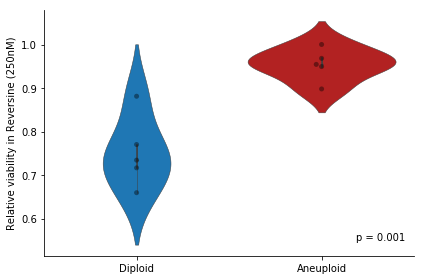

In [54]:
ax=sns.violinplot(y = 'viability',x='ploidy', data = data,saturation=1,linewidth=.5,order=my_order,palette = my_pal)
sns.swarmplot(y = 'viability',x='ploidy', data = data,color='black',alpha=.4,order=my_order)

plt.xlabel('')
plotting.simpleaxis()



tt,p_val = stats.ttest_ind(data.loc[data.index[0:5],'viability'].dropna(),data.loc[data.index[5:],'viability'].dropna())
ax.legend(title='p = '+ str(round(p_val,3)),frameon=False,loc='lower right')
plt.ylabel('Relative viability in Reversine (250nM)')
plt.tight_layout()
plt.savefig('supp1/extra_violin_plot.pdf')

In [55]:
df1 = pd.DataFrame(index=['a','b','c','d'],columns = ['m','n','b','v'],data=1)
df2 = pd.DataFrame(index=['a','b','c','d'],columns = ['q','w'],data=2)

In [56]:
df1.loc[:,['b','v']] = df2.values

In [57]:
df1

,m,n,b,v
a,1,1,2,2
b,1,1,2,2
c,1,1,2,2
d,1,1,2,2


In [58]:
df2

,q,w
a,2,2
b,2,2
c,2,2
d,2,2
